In [22]:
from sklearn.datasets import load_boston


In [23]:
boston_house_prize = load_boston()


In [24]:
import pandas as pd

boston_house_prize

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [25]:
datahousing =data=boston_house_prize.data 

In [26]:
datahousing 

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [27]:
dataTargets = boston_house_prize.target.reshape(-1,1)
dataTargets.shape

(506, 1)

In [28]:
print(boston_house_prize.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [29]:
import matplotlib.pyplot as plt

In [30]:
#corr_matrix = datahousing.corr()

In [31]:
#corr_matrix['AGE'].sort_values(ascending=False)

In [32]:
import numpy as np

def train_test_split(data , label , ratio=0.2) :
    shuffle_indices = np.random.permutation(len(data))
    test_indices = shuffle_indices[:int(len(data)*ratio)]
    train_indices = shuffle_indices[int(len(data)*ratio):]
    train_data , train_label = data[train_indices,] , label[train_indices,]
    test_data , test_label = data[test_indices] , label[test_indices]
    
    return train_data , train_label , test_data , test_label

In [33]:
train_data  , train_label , test_data , test_label = train_test_split(datahousing , dataTargets)

In [34]:
train_data

array([[5.30200e-02, 0.00000e+00, 3.41000e+00, ..., 1.78000e+01,
        3.96060e+02, 5.70000e+00],
       [3.69695e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.16030e+02, 1.40000e+01],
       [5.37200e-02, 0.00000e+00, 1.39200e+01, ..., 1.60000e+01,
        3.92850e+02, 7.39000e+00],
       ...,
       [1.83370e-01, 0.00000e+00, 2.77400e+01, ..., 2.01000e+01,
        3.44050e+02, 2.39700e+01],
       [2.10380e-01, 2.00000e+01, 3.33000e+00, ..., 1.49000e+01,
        3.96900e+02, 4.85000e+00],
       [1.22040e-01, 0.00000e+00, 2.89000e+00, ..., 1.80000e+01,
        3.57980e+02, 6.65000e+00]])

In [35]:
train_label.shape


(405, 1)

In [36]:
test_label.shape

(101, 1)

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
linReg = LinearRegression()

In [39]:
linReg.fit(train_data , train_label)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
predict = linReg.predict(test_data)


In [41]:
from sklearn.metrics import mean_squared_error

In [42]:
msr  = mean_squared_error(test_label , predict)

In [43]:
msr

24.596807559618526

In [44]:
rmsr = np.sqrt(msr)

In [45]:
rmsr

4.959516867560643

In [46]:
from sklearn.tree import DecisionTreeRegressor

In [47]:
dtr = DecisionTreeRegressor()


In [48]:
dtr.fit(train_data , train_label)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [49]:
np.sqrt(mean_squared_error(test_label , dtr.predict(test_data)))

3.420917021403287

In [50]:
from sklearn.model_selection import cross_val_score

In [51]:
cvs = cross_val_score(dtr ,train_data , train_label ,scoring="neg_mean_squared_error" , cv=10)

In [52]:
rcvs = np.sqrt(-cvs)
rcvs

array([4.19401432, 6.67605843, 4.3019281 , 7.29476926, 5.07418142,
       5.19259088, 3.61026315, 6.12153984, 4.5153073 , 5.39307426])

In [53]:
def display_score(score) :
    print("score : " , score)
    print('mean :' , score.mean())
    print("standart deviation :" , score.std())

In [54]:
display_score(rcvs)

score :  [4.19401432 6.67605843 4.3019281  7.29476926 5.07418142 5.19259088
 3.61026315 6.12153984 4.5153073  5.39307426]
mean : 5.237372694298083
standart deviation : 1.1076933592353144


In [55]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
lin_cvs = cross_val_score(linreg , train_data , train_label , scoring="neg_mean_squared_error" , cv=10)

In [56]:
rlin_cvs = np.sqrt(-lin_cvs)

In [57]:
display_score(rlin_cvs)

score :  [4.51008658 5.28035488 4.55109073 5.69469599 5.85698975 6.29239599
 3.8146441  3.38435164 4.11979701 4.25409474]
mean : 4.775850141248382
standart deviation : 0.908380069300521


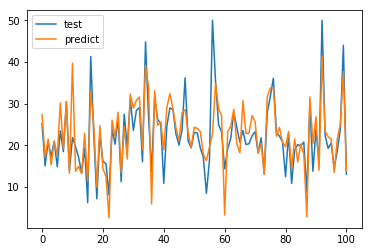

In [58]:
plt.plot([i for i in range(len(test_data))],test_label , label="test" )
plt.plot([i for i in range(len(test_data))] , predict, label="predict")
plt.legend()

In [59]:
from sklearn.ensemble import RandomForestRegressor

In [60]:
crfg = RandomForestRegressor() 

In [61]:
crfg.fit(train_data , train_label.flatten())

c:\users\ghomsi\appdata\local\programs\python\python35\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [62]:
pre = crfg.predict(test_data)

In [63]:
from sklearn.metrics import mean_squared_error

In [64]:
mser_rfg = mean_squared_error(test_label ,pre)

In [65]:
root_mser_rfg = np.sqrt(mser_rfg)

In [66]:
root_mser_rfg

3.9342213994387727

In [67]:
val = cross_val_score(crfg , train_data , train_label.flatten() , scoring="neg_mean_squared_error" , cv=10)

In [68]:
rfg_score = np.sqrt(-val)

In [69]:
display_score(rfg_score)

score :  [2.42149319 4.35538271 3.46642924 5.1471837  3.728691   4.88401653
 2.55758969 3.2964625  2.72304976 3.48144833]
mean : 3.606174665185967
standart deviation : 0.8943058167802391


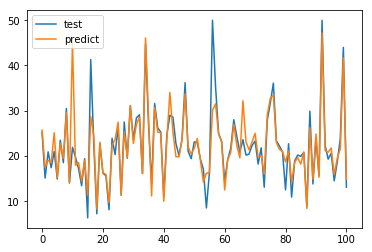

In [70]:
plt.plot([i for i in range(len(test_data))],test_label , label="test" )
plt.plot([i for i in range(len(test_data))] , pre, label="predict")
plt.legend()

In [71]:
from sklearn.preprocessing import PolynomialFeatures

In [72]:
polyFeat = PolynomialFeatures(degree=2,include_bias=False)

In [73]:
train_poly_data = polyFeat.fit_transform(train_data)

In [74]:
val2 = cross_val_score(crfg , train_poly_data , train_label.flatten() , scoring="neg_mean_squared_error" , cv=10)

In [75]:
sq = np.sqrt(-val2)

In [76]:
display_score(sq)

score :  [2.9648074  3.44894116 3.28939352 4.47858046 4.00968705 4.00860605
 2.24472103 2.96335283 4.11652736 3.0837307 ]
mean : 3.4608347563595236
standart deviation : 0.6489403953637727


In [77]:
from sklearn.model_selection import GridSearchCV




In [78]:
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

In [79]:
grid_search = GridSearchCV(crfg , param_grid , cv=5 ,scoring="neg_mean_squared_error")

In [80]:
grid_search.fit(train_data , train_label.flatten() )

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],
    

In [81]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 4, 'n_estimators': 10}

In [82]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
                      max_features=4, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [83]:
cvres = grid_search.cv_results_

In [84]:
cvres

{'mean_fit_time': array([0.03750334, 0.08438101, 0.24377851, 0.02502174, 0.08121748,
        0.26557579, 0.03437657, 0.09377437, 0.2999373 , 0.03123312,
        0.09386053, 0.28129086, 0.02186899, 0.06251845, 0.01870565,
        0.06880326, 0.01552963, 0.07197785]),
 'mean_score_time': array([0.00625072, 0.00937586, 0.01565666, 0.00622625, 0.01250372,
        0.01569409, 0.00625219, 0.        , 0.01572652, 0.00312543,
        0.00618348, 0.01560736, 0.00629454, 0.01560097, 0.00628409,
        0.00312514, 0.00307965, 0.00619583]),
 'mean_test_score': array([-28.90197257, -17.01151679, -15.34720109, -19.88126475,
        -14.11151333, -14.72253748, -17.61690535, -17.2565958 ,
        -13.72464941, -18.8059369 , -15.57781235, -13.87469723,
        -22.29885597, -15.94864222, -18.29110562, -15.80747531,
        -21.71807407, -13.58235926]),
 'param_bootstrap': masked_array(data=[--, --, --, --, --, --, --, --, --, --, --, --, False,
                    False, False, False, False, False],
 

In [85]:
for mean_error , params in zip(cvres['mean_test_score'] , cvres['params']) :
    print(np.sqrt(-mean_error) , params)

5.376055483824339 {'max_features': 2, 'n_estimators': 3}
4.124502005106005 {'max_features': 2, 'n_estimators': 10}
3.9175503946146475 {'max_features': 2, 'n_estimators': 30}
4.458841188720194 {'max_features': 4, 'n_estimators': 3}
3.756529426656117 {'max_features': 4, 'n_estimators': 10}
3.8369958921002913 {'max_features': 4, 'n_estimators': 30}
4.1972497364100505 {'max_features': 6, 'n_estimators': 3}
4.1541058968771045 {'max_features': 6, 'n_estimators': 10}
3.7046793937061397 {'max_features': 6, 'n_estimators': 30}
4.336581245619967 {'max_features': 8, 'n_estimators': 3}
3.9468737433162224 {'max_features': 8, 'n_estimators': 10}
3.724875464908986 {'max_features': 8, 'n_estimators': 30}
4.7221664484723735 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
3.99357511788901 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
4.2768102160538595 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
3.975861580669273 {'bootstrap': False, 'max_features': 3, 'n_estimato